In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from statsmodels.tsa.holtwinters import Holt
model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor(n_estimators=7)
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
train_data = pd.read_csv(r"C:\Users\DELL\Downloads\store-sales-time-series-forecasting\train.csv",parse_dates=['date'])
test_data = pd.read_csv(r"C:\Users\DELL\Downloads\store-sales-time-series-forecasting\test.csv",parse_dates=['date'])
oil_data = pd.read_csv(r"C:\Users\DELL\Downloads\store-sales-time-series-forecasting\oil.csv",parse_dates=['date'])
stores_data = pd.read_csv(r"C:\Users\DELL\Downloads\store-sales-time-series-forecasting\stores.csv")
holidays_event = pd.read_csv(r"C:\Users\DELL\Downloads\store-sales-time-series-forecasting\holidays_events.csv",parse_dates=['date'])
transactions_data = pd.read_csv(r"C:\Users\DELL\Downloads\store-sales-time-series-forecasting\transactions.csv",parse_dates=['date'])

# Data exploration 

In [6]:
print(train_data.head())
print(test_data.head())
print(oil_data.head())
print(stores_data.head())
print(holidays_event.head())
print(transactions_data.head())

   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0
        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D    

In [105]:
print(train_data.info())
print(test_data.info())
print(oil_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None
<class 'pan

In [106]:
print(stores_data.isna().sum())
print(oil_data.isna().sum())
print(holidays_event.isna().sum())
transactions_data.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


date            0
store_nbr       0
transactions    0
dtype: int64

In [107]:
oil_data['dcoilwtico'].fillna(oil_data['dcoilwtico'].mean(),inplace=True)
oil_data.isna().sum()

date          0
dcoilwtico    0
dtype: int64

# visulizations

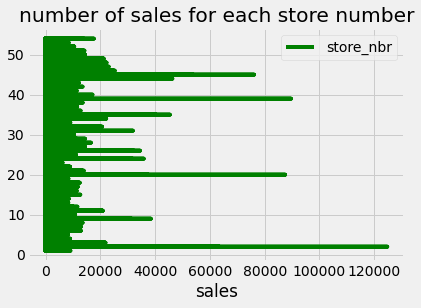

In [108]:
train_data.plot.line(x ='sales',y = 'store_nbr',title = 'number of sales for each store number',color = 'g')
plt.show()

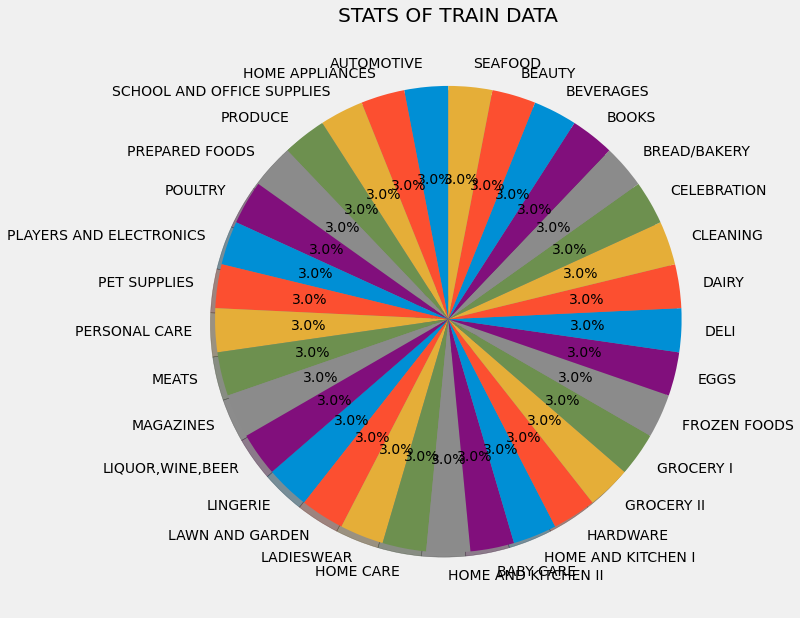

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
count_product = train_data['family'].value_counts()
plt.title("Stats of train data".upper())


plt.pie(count_product, labels = count_product.index,shadow=True,startangle=90,autopct='%1.1f%%')

plt.show()

C:\Users\DELL\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='locale'>

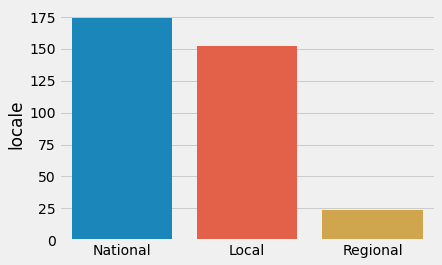

In [110]:
sns.barplot(holidays_event['locale'].value_counts().index,holidays_event["locale"].value_counts())

C:\Users\DELL\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='type'>

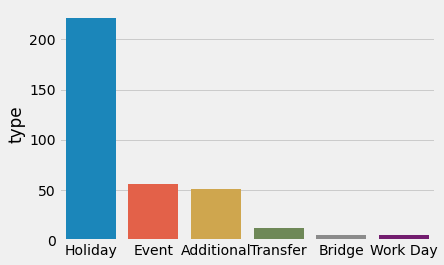

In [111]:
sns.barplot(holidays_event['type'].value_counts().index,holidays_event["type"].value_counts())

In [19]:
total_train_data = pd.merge(train_data,holidays_event,on = 'date')
total_train_data = pd.merge(total_train_data,oil_data,on = 'date')
total_train_data = pd.merge(total_train_data,stores_data,on = 'store_nbr')
total_train_data = pd.merge(total_train_data,transactions_data,on = ['store_nbr','date'],how = 'left')
total_train_data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [20]:
total_train_data.rename(columns={'type_x':'holidaytype', 'type_y':'storetype'}, inplace=True)
total_train_data.head()

,id,date,store_nbr,family,sales,onpromotion,holidaytype,locale,locale_name,description,transferred,dcoilwtico,city,state,storetype,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


                    id     store_nbr     sales  onpromotion   transferred  \
id            1.000000  3.281605e-04  0.078873     0.186900  1.323856e-01   
store_nbr     0.000328  1.000000e+00  0.038804     0.017356 -1.465537e-15   
sales         0.078873  3.880422e-02  1.000000     0.421813 -3.653843e-03   
onpromotion   0.186900  1.735575e-02  0.421813     1.000000  3.012134e-02   
transferred   0.132386 -1.465537e-15 -0.003654     0.030121  1.000000e+00   
dcoilwtico   -0.841029  6.296485e-15 -0.075116    -0.138408 -5.349308e-02   
cluster      -0.000048 -5.928399e-02  0.035902     0.008095  7.386371e-16   
transactions -0.018267  1.719464e-01  0.203691     0.038163 -4.390226e-02   

                dcoilwtico       cluster  transactions  
id           -8.410291e-01 -4.758480e-05     -0.018267  
store_nbr     6.296485e-15 -5.928399e-02      0.171946  
sales        -7.511643e-02  3.590181e-02      0.203691  
onpromotion  -1.384083e-01  8.095010e-03      0.038163  
transferred  -5.34930

<AxesSubplot:>

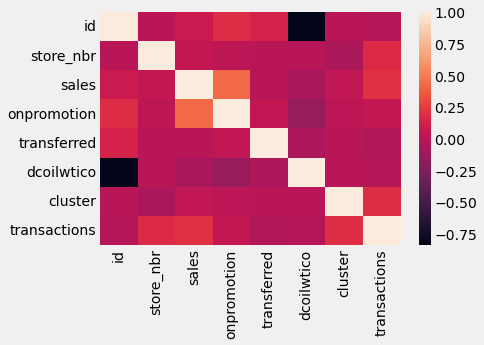

In [21]:
print(total_train_data.corr())
sns.heatmap(total_train_data.corr())

In [22]:
total_train_data['transactions'].fillna(0.0,inplace = True)
total_train_data.head()

,id,date,store_nbr,family,sales,onpromotion,holidaytype,locale,locale_name,description,transferred,dcoilwtico,city,state,storetype,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,0.0


In [23]:
total_train_data= total_train_data.drop(['locale','locale_name','description','city','state'],axis=1)

In [24]:
def converttonumber(col, df):
    colvalues = df[col].value_counts()
    colvaluelist = colvalues.index
    colvaluesseries = pd.Series(colvaluelist)
    
    for ivalue in range(0,len(colvaluesseries)):
        df[col].replace(colvaluesseries[ivalue], colvaluesseries[colvaluesseries == colvaluesseries[ivalue]].index[0], inplace=True)
    return df

In [25]:
total_train_data= converttonumber('holidaytype',total_train_data)
total_train_data = converttonumber('storetype',total_train_data)
total_train_data = converttonumber('family',total_train_data)
total_train_data['date'] = total_train_data['date'].astype(str).str.replace('-','')
total_train_data['test']= 0

In [26]:
total_train_data.head()

,id,date,store_nbr,family,sales,onpromotion,holidaytype,transferred,dcoilwtico,storetype,cluster,transactions,test
0,0,20130101,1,0,0.0,0,0,False,NaN,0,13,0.0,0
1,1,20130101,1,17,0.0,0,0,False,NaN,0,13,0.0,0
2,2,20130101,1,31,0.0,0,0,False,NaN,0,13,0.0,0
3,3,20130101,1,30,0.0,0,0,False,NaN,0,13,0.0,0
4,4,20130101,1,29,0.0,0,0,False,NaN,0,13,0.0,0


In [120]:
total_test_data = pd.merge(test_data,holidays_event,on = 'date')
total_test_data = pd.merge(total_test_data,oil_data,on = 'date')
total_test_data = pd.merge(total_test_data,stores_data,on = 'store_nbr')
total_test_data = pd.merge(total_test_data,transactions_data,on = ['store_nbr','date'],how = 'left')
total_test_data.head()

,id,date,store_nbr,family,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,3015144,2017-08-24,1,AUTOMOTIVE,0,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24,Quito,Pichincha,D,13,NaN
1,3015145,2017-08-24,1,BABY CARE,0,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24,Quito,Pichincha,D,13,NaN
2,3015146,2017-08-24,1,BEAUTY,0,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24,Quito,Pichincha,D,13,NaN
3,3015147,2017-08-24,1,BEVERAGES,26,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24,Quito,Pichincha,D,13,NaN
4,3015148,2017-08-24,1,BOOKS,0,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24,Quito,Pichincha,D,13,NaN


In [121]:
total_test_data['transactions'].fillna(0.0,inplace = True)
total_test_data.rename(columns={'type_x':'holidaytype', 'type_y':'storetype'}, inplace=True)
total_test_data= total_test_data.drop(['locale','locale_name','description','city','state'],axis=1)
total_test_data.head()

,id,date,store_nbr,family,onpromotion,holidaytype,transferred,dcoilwtico,storetype,cluster,transactions
0,3015144,2017-08-24,1,AUTOMOTIVE,0,Holiday,False,47.24,D,13,0.0
1,3015145,2017-08-24,1,BABY CARE,0,Holiday,False,47.24,D,13,0.0
2,3015146,2017-08-24,1,BEAUTY,0,Holiday,False,47.24,D,13,0.0
3,3015147,2017-08-24,1,BEVERAGES,26,Holiday,False,47.24,D,13,0.0
4,3015148,2017-08-24,1,BOOKS,0,Holiday,False,47.24,D,13,0.0


In [122]:
total_test_data= converttonumber('holidaytype',total_test_data)
total_test_data = converttonumber('storetype',total_test_data)
total_test_data = converttonumber('family',total_test_data)
total_test_data['date'] = total_test_data['date'].astype(str).str.replace('-','')
total_test_data['test']=1
total_test_data.head()

,id,date,store_nbr,family,onpromotion,holidaytype,transferred,dcoilwtico,storetype,cluster,transactions,test
0,3015144,20170824,1,0,0,0,False,47.24,0,13,0.0,1
1,3015145,20170824,1,17,0,0,False,47.24,0,13,0.0,1
2,3015146,20170824,1,31,0,0,False,47.24,0,13,0.0,1
3,3015147,20170824,1,30,26,0,False,47.24,0,13,0.0,1
4,3015148,20170824,1,29,0,0,False,47.24,0,13,0.0,1


In [123]:
X = total_train_data[['id','date','store_nbr', 'family', 'onpromotion', 'holidaytype', 'dcoilwtico', 'storetype', 'cluster', 'transactions']]
y = total_train_data['sales']
x_pred = total_test_data[['id','date','store_nbr', 'family', 'onpromotion', 'holidaytype', 'dcoilwtico', 'storetype', 'cluster', 'transactions']]

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25)

In [125]:
print(model1.fit(X_train,y_train))
print(model2.fit(X_train,y_train))
model3 = Holt(endog = y_train,initialization_method="estimated").fit(smoothing_level=0.4)

DecisionTreeRegressor()
RandomForestRegressor(n_estimators=7)


C:\Users\DELL\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [126]:
print(model1.score(X_test,y_test))
print(model2.score(X_test,y_test))

0.725419492457416
0.797723544930965


In [127]:
predic1 = pd.DataFrame(model1.predict(x_pred))
predic2 = pd.DataFrame(model2.predict(x_pred))
predic3 = pd.DataFrame(model3.forecast(1782))

C:\Users\DELL\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


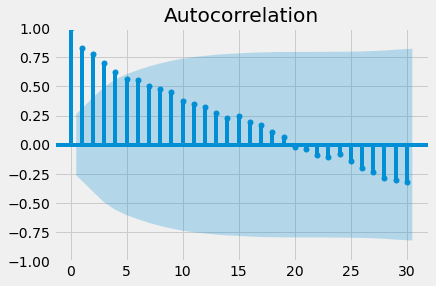

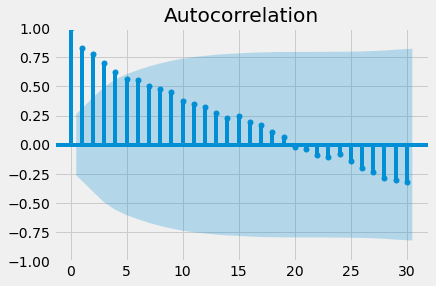

In [31]:
plot_acf(grouped_data['mean'],lags=30)

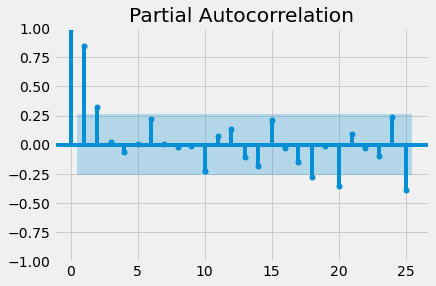

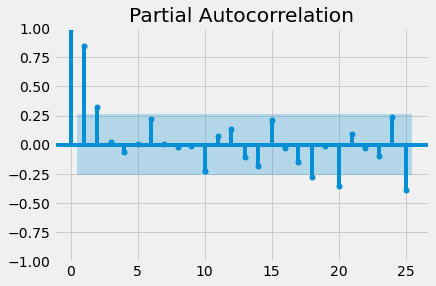

In [33]:
plot_pacf(grouped_data['mean'],lags=25)

,mean
date,
2013-01-31,186.952405
2013-02-28,193.581846
2013-03-31,206.880581
2013-04-30,205.639071
2013-05-31,209.943594
